In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

warnings.filterwarnings('ignore')

In [2]:
''' reading data '''
df = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/budi-23.appspot.com/o/dataset%2FIncome%20Predictive%20Modeling%2Fadult.csv?alt=media&token=faa90eea-1666-45f0-9b9c-10ac08b99c1f')

In [3]:
''' displaying first 5 rows '''
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
''' shape of data '''
df.shape

(32561, 15)

In [5]:
''' checking null values '''
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
''' info of data '''
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
''' renaming column names '''
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
              'race', 'sex', 'capita_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capita_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
''' changing incoem variable '''
df.income = np.where(df['income'] == ' >50K', 1, 0)

In [10]:
''' unique values in each categorical variables '''
for c in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']:
    print("{} has {} unique categories".format(c, df[c].unique()))
    print("-"*100)

workclass has ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] unique categories
----------------------------------------------------------------------------------------------------
education has ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] unique categories
----------------------------------------------------------------------------------------------------
marital_status has ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] unique categories
----------------------------------------------------------------------------------------------------
occupation has ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'T

In [11]:
''' changing sex column '''
df['sex'] = np.where(df['sex'] == ' Male', 1, 0)

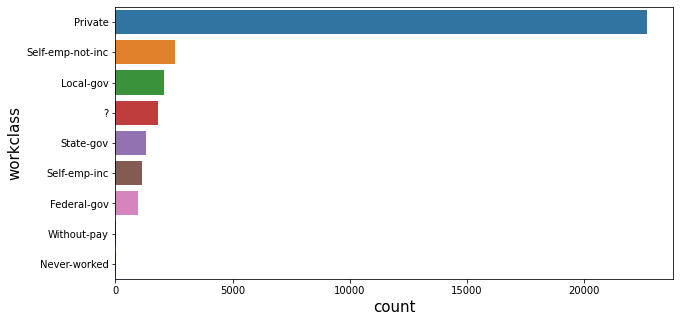

In [12]:
''' value counts of workclass '''
workclass_label = df.workclass.value_counts()

''' barplot '''
plt.figure(figsize=(10, 5))
sns.barplot(workclass_label, workclass_label.index);
plt.ylabel('workclass', fontsize=15);
plt.xlabel('count', fontsize=15);

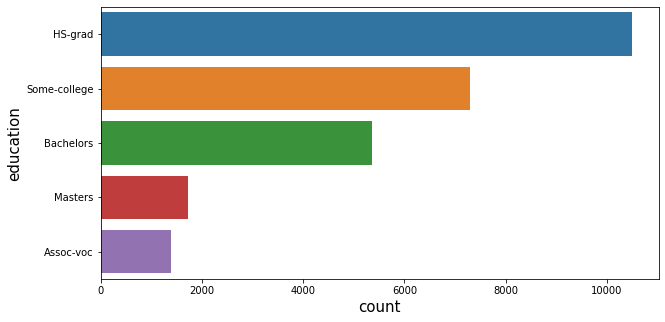

In [13]:
''' value counts of educatuion '''
edu_label = df.education.value_counts()[:5]

''' barplot '''
plt.figure(figsize=(10, 5))
sns.barplot(edu_label, edu_label.index);
plt.ylabel('education', fontsize=15);
plt.xlabel('count', fontsize=15);

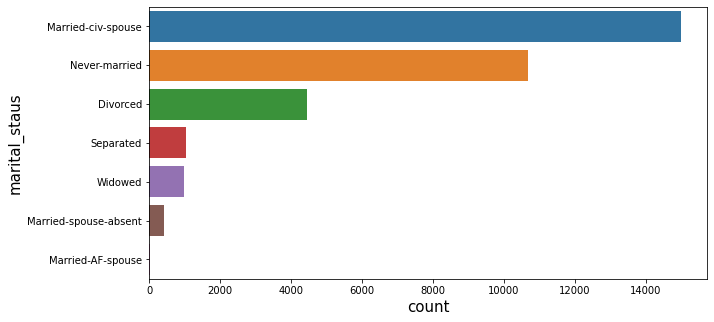

In [14]:
''' value_counts of marital_status '''
ms_label = df.marital_status.value_counts()

''' barplot '''
plt.figure(figsize=(10, 5))
sns.barplot(ms_label, ms_label.index);
plt.ylabel('marital_staus', fontsize=15);
plt.xlabel('count', fontsize=15);

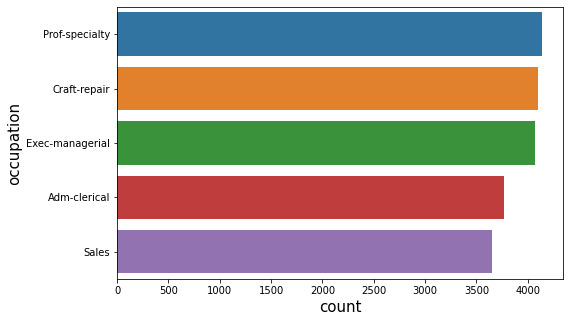

In [15]:
''' value_counts of occupation '''
occ_label = df.occupation.value_counts()[:5]

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(occ_label, occ_label.index);
plt.ylabel('occupation', fontsize=15);
plt.xlabel('count', fontsize=15);

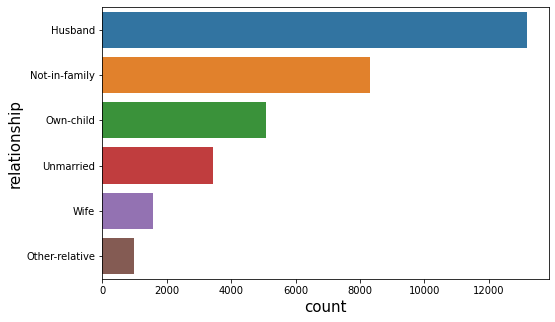

In [16]:
''' value_counts of relationship '''
rel_label = df.relationship.value_counts()

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(rel_label, rel_label.index);
plt.ylabel('relationship', fontsize=15);
plt.xlabel('count', fontsize=15);

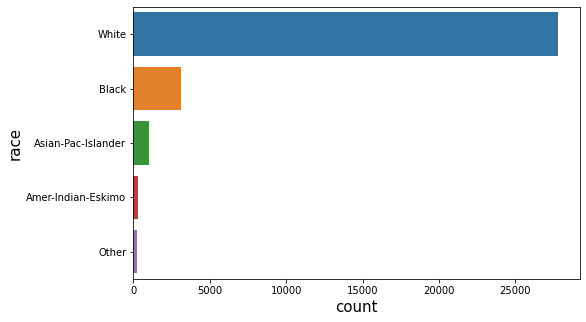

In [17]:
''' value_counts of race '''
r_label = df.race.value_counts()

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(r_label, r_label.index);
plt.ylabel('race', fontsize=15);
plt.xlabel('count', fontsize=15);

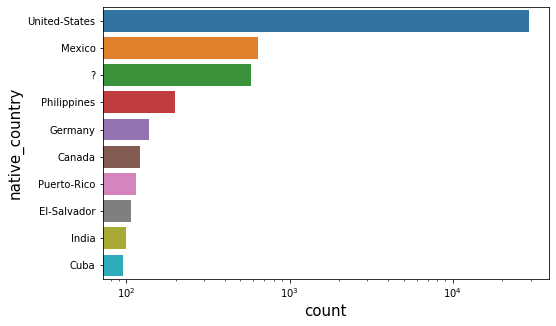

In [18]:
''' value_counts of native_country '''
nc_label = df.native_country.value_counts()[:10]

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(nc_label, nc_label.index, log=True);
plt.ylabel('native_country', fontsize=15);
plt.xlabel('count', fontsize=15);

In [19]:
''' changing native_country if united_state then united_state else other '''
df['native_country'] = np.where(df['native_country'] == ' United-States', 'United-States', 'Others')

In [20]:
''' filling ? value with np.nan in workclass '''
df['workclass'] = np.where(df['workclass'] == ' ?', np.nan, df['workclass'])

''' filling ? value with np.nan in occupation '''
df['occupation'] = np.where(df['occupation'] == ' ?', np.nan, df['occupation'])

''' dropping null values '''
df.dropna(inplace=True)

In [21]:
''' changing education variable '''
edu_label = {value: key for key, value in enumerate(df.education.unique())}
df['education'] = df['education'].map(edu_label)

''' changing workclass variable '''
wc_label = {value: key for key, value in enumerate(df.workclass.unique())}
df['workclass'] = df['workclass'].map(wc_label)

''' changing marital_status variable '''
ms_label = {value: key for key, value in enumerate(df.marital_status.unique())}
df.marital_status = df.marital_status.map(ms_label)

''' changing occupation variable '''
occ_label = {value: key for key, value in enumerate(df.occupation.unique())}
df.occupation = df.occupation.map(occ_label)

''' changing race variable '''
r_label = {value: key for key, value in enumerate(df.race.unique())}
df.race =  df.race.map(r_label)

''' changing race native_country '''
df['native_country'] = np.where(df['native_country'] == 'United-States', 1, 0)

''' changing race relationship '''
rel_label = {value: key for key, value in enumerate(df.relationship.unique())}
df.relationship = df.relationship.map(rel_label)

In [22]:
''' independent and dependent variables '''
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [23]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
print('Xtrain shape: ', X_train.shape)
print('Xtest shape: ', X_test.shape)

Xtrain shape:  (24420, 14)
Xtest shape:  (8141, 14)


In [25]:
''' Mode '''
lgbm = LGBMClassifier()

''' fit on data '''
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
''' prediction '''
pred = lgbm.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  1.0
